In [1]:
import pandas as pd
import numpy
import csv
import matplotlib.pyplot as plt

In [2]:
PATH_DATA = './dataset/'

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,10)

In [4]:
df_pop = pd.read_csv(PATH_DATA+'API_SP.POP.TOTL_DS2_en_csv_v2.csv')

In [5]:
df_2016 = pd.read_csv(PATH_DATA+'HIGH_AGLINK_2016_18102017105443042.csv')

In [6]:
df_2017 = pd.read_csv(PATH_DATA+'HIGH_AGLINK_2017_18102017105338729.csv')

In [7]:
df_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [8]:
df_2016.Commodity.value_counts

<bound method IndexOpsMixin.value_counts of 0             Wheat
1             Wheat
2             Wheat
3             Wheat
4             Wheat
5             Wheat
6             Wheat
7             Wheat
8             Wheat
9             Wheat
10            Wheat
11            Wheat
12            Wheat
13            Wheat
14            Wheat
15            Wheat
16            Wheat
17            Wheat
18            Wheat
19            Wheat
20            Wheat
21            Wheat
22            Wheat
23            Wheat
24            Wheat
25            Wheat
26            Wheat
27            Wheat
28            Wheat
29            Wheat
            ...    
175706    Biodiesel
175707    Biodiesel
175708    Biodiesel
175709    Biodiesel
175710    Biodiesel
175711    Biodiesel
175712    Biodiesel
175713    Biodiesel
175714    Biodiesel
175715    Biodiesel
175716    Biodiesel
175717    Biodiesel
175718    Biodiesel
175719    Biodiesel
175720    Biodiesel
175721    Biodiesel
175722    Biodie

In [9]:
df_2016.head()

,COUNTRY,Country,COMMODITY,Commodity,VARIABLE,Variable,TIME,Time,Value,Flag Codes,Flags
0,AUS,Australia,WT,Wheat,QP,Production,2015,2015,23981.80800,NaN,NaN
1,AUS,Australia,WT,Wheat,QP,Production,2016,2016,24908.13334,NaN,NaN
2,AUS,Australia,WT,Wheat,QP,Production,2017,2017,25596.13971,NaN,NaN
3,AUS,Australia,WT,Wheat,QP,Production,2018,2018,26135.14009,NaN,NaN
4,AUS,Australia,WT,Wheat,QP,Production,2019,2019,26317.25042,NaN,NaN


In [10]:
df_2016['Country'].value_counts()

WORLD                          3619
United States                  3542
European Union-28              3289
Canada                         3234
China                          3201
Japan                          3201
DEVELOPED COUNTRIES            3190
Argentina                      3190
OECD countries                 3157
Brazil                         3157
Israel                         3146
Mexico                         3135
Australia                      3135
Sudan                          3124
Korea                          3080
Haiti                          3069
New Zealand                    3058
Russian Federation             3058
India                          3014
DEVELOPING COUNTRIES           3014
Iran                           3003
Non-OECD                       3003
Thailand                       2992
Indonesia                      2992
Chile                          2992
Colombia                       2981
Viet Nam                       2981
Turkey                      

# Готова функція для створення ratio по країнах, по вибраному товару, по року

In [11]:
def prepare_ratio(df, year, commodity, df_pop):
    df_filt = df[df['Time'] == year]
    df_filt_2 = df_filt[df_filt['Commodity'] == commodity][df_filt['Variable'] == 'Consumption']
    df_consump = df_filt_2.drop(['Flags', 'Flag Codes', 'VARIABLE', 'Time', 'COMMODITY', 'Commodity', 'Variable'], axis=1)
    df_pop_filt = df_pop[['Country Code', str(year)]]
    df_pop_filt = df_pop_filt.rename(columns={'Country Code': 'COUNTRY'})
    result = df_pop_filt.merge(df_consump, left_on='COUNTRY', right_on='COUNTRY', how='inner')
    result = result.sort_values('Value')
    result['ratio'] = result['Value'] / result[str(year)]
    result.sort_values('ratio')
    return result

In [12]:
def plot_values(df, year, lst, df_pop):
    df_plot = pd.DataFrame({'COUNTRY' : df['COUNTRY'].unique()})
    for i in lst:
        df1 = prepare_ratio(df, year, i, df_pop)
        df1[i] = df1['ratio']
        df1 = df1.drop(['2015', 'Country', 'TIME', 'Value', 'ratio'], axis=1)        
        df_plot = df_plot.merge(df1, left_on='COUNTRY', right_on='COUNTRY', how='inner')
    df_plot = df_plot.set_index(df_plot['COUNTRY'])
    del df_plot['COUNTRY']
    return df_plot

In [13]:
res = prepare_ratio(df_2016, 2015, 'Wheat', df_pop)
res = res.reset_index()
res = res.drop(res.index[[47, 46, 40, 37, 43]])
res

/home/maria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,index,COUNTRY,2015,Country,TIME,Value,ratio
0,13,HTI,1.071106e+07,Haiti,2015,245.000000,0.000023
1,47,ZMB,1.610059e+07,Zambia,2015,270.000000,0.000017
2,12,GHA,2.758282e+07,Ghana,2015,325.000000,0.000012
3,33,PRY,6.639119e+06,Paraguay,2015,419.000885,0.000063
4,42,URY,3.431552e+06,Uruguay,2015,432.000000,0.000126
5,24,MOZ,2.801069e+07,Mozambique,2015,594.999146,0.000021
6,40,TZA,5.387996e+07,Tanzania,2015,800.000000,0.000015
7,28,NZL,4.595700e+06,New Zealand,2015,907.059715,0.000197
8,5,CHE,8.282396e+06,Switzerland,2015,998.999100,0.000121
9,27,NOR,5.188607e+06,Norway,2015,1004.000000,0.000194


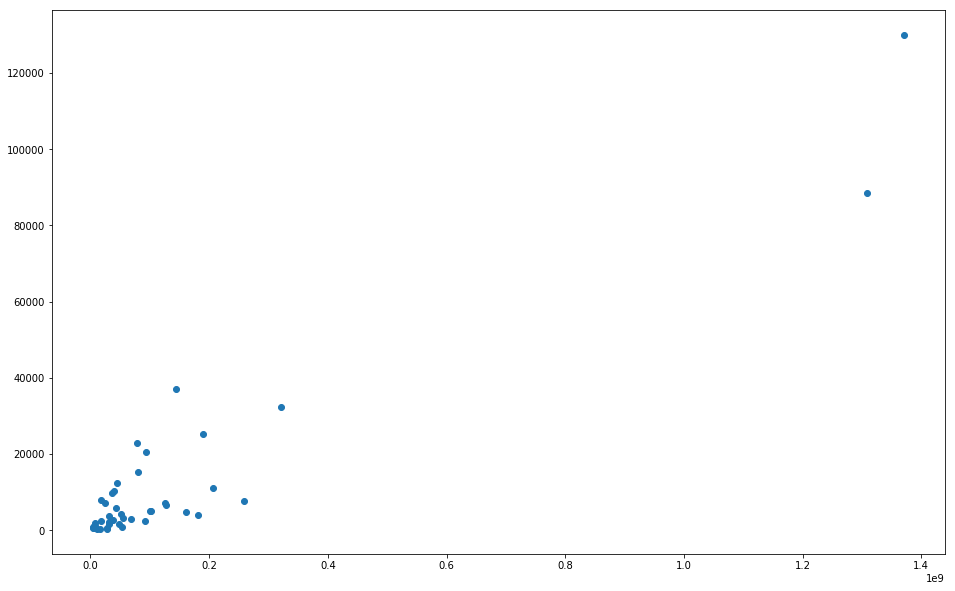

In [14]:
plt.scatter(res['2015'], res['Value'])

In [15]:
res.sort_values('ratio')

,index,COUNTRY,2015,Country,TIME,Value,ratio
2,12,GHA,2.758282e+07,Ghana,2015,325.000000,0.000012
6,40,TZA,5.387996e+07,Tanzania,2015,800.000000,0.000015
1,47,ZMB,1.610059e+07,Zambia,2015,270.000000,0.000017
5,24,MOZ,2.801069e+07,Mozambique,2015,594.999146,0.000021
20,26,NGA,1.811817e+08,Nigeria,2015,3970.000000,0.000022
0,13,HTI,1.071106e+07,Haiti,2015,245.000000,0.000023
14,44,VNM,9.171330e+07,Viet Nam,2015,2340.000977,0.000026
22,2,BGD,1.612009e+08,Bangladesh,2015,4694.999023,0.000029
29,14,IDN,2.581621e+08,Indonesia,2015,7650.000977,0.000030
11,8,COL,4.822870e+07,Colombia,2015,1516.000000,0.000031


In [16]:
df_plot = pd.DataFrame(res['ratio'])
df_plot = df_plot.set_index(res['COUNTRY'])

In [17]:
df_plot = df_plot.sort_values('ratio')

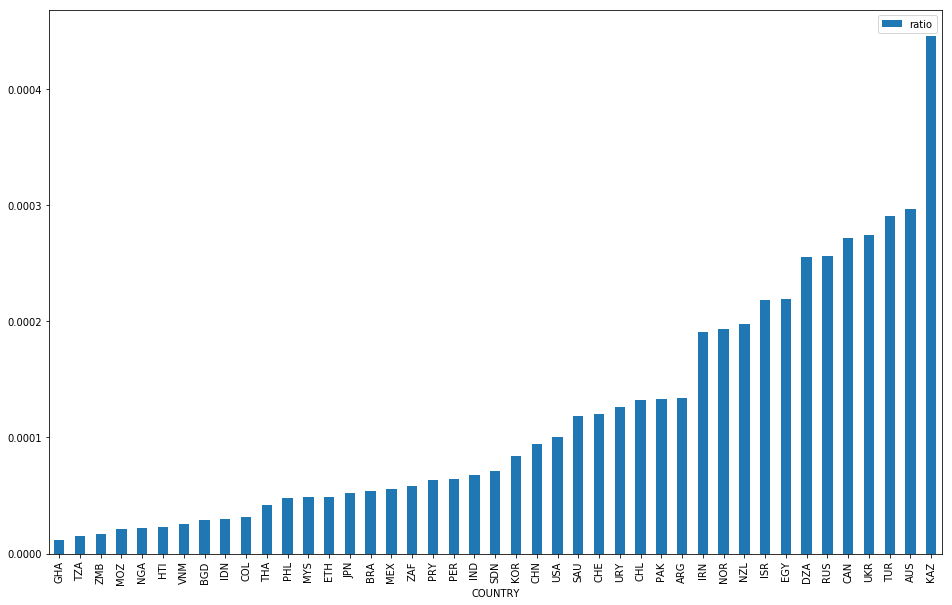

In [18]:
df_plot.plot(kind='bar')

/home/maria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


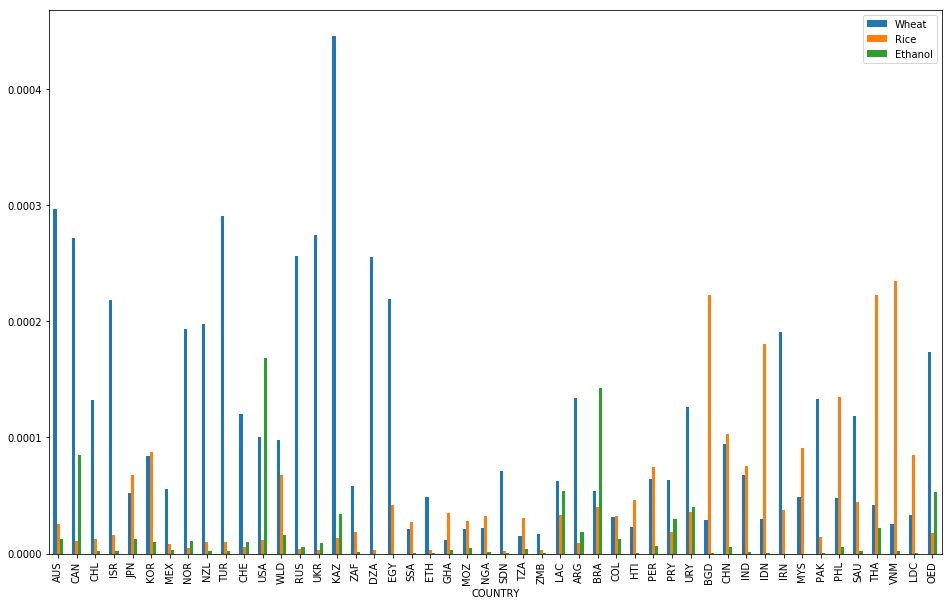

In [19]:
plot_values(df_2016, 2015, ['Wheat', 'Rice', 'Ethanol'], df_pop).plot(kind='bar')

In [20]:
pd.DataFrame(df_2016['COUNTRY'].unique()).head()

,0
0,AUS
1,CAN
2,CHL
3,EUN
4,ISR
